                        age  tenure_months  monthly_spend  support_tickets  \
age                1.000000       0.007620      -0.008142         0.010736   
tenure_months      0.007620       1.000000       0.047037         0.017403   
monthly_spend     -0.008142       0.047037       1.000000         0.028057   
support_tickets    0.010736       0.017403       0.028057         1.000000   
login_frequency    0.008051      -0.021772       0.014626         0.022114   
churn              0.006415      -0.032013      -0.034610        -0.085828   
gender_binary      0.018030      -0.030537       0.022655        -0.009401   
is_basic           0.021105      -0.008417       0.042897         0.034556   
is_standard       -0.015792       0.022090       0.047416        -0.068124   
is_premium        -0.005266      -0.014258      -0.093068         0.035158   
spend_per_month    0.006224      -0.599912       0.267644        -0.008700   
tickets_per_login -0.000714       0.018603       0.053317       

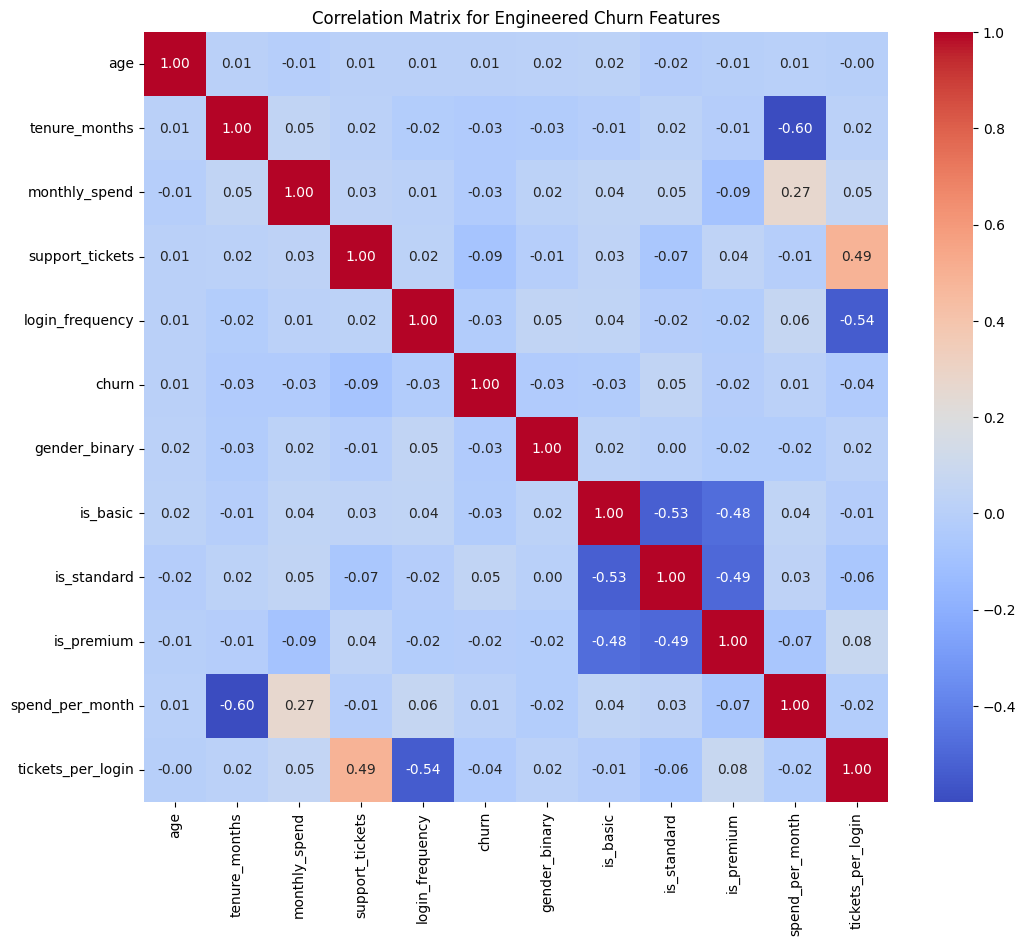

In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load your cleaned churn dataset
df = pd.read_csv('churn_clean_data.csv')

# 3️⃣ Interaction / aggregate features
df['spend_per_month'] = df['monthly_spend'] / (df['tenure_months'] + 1)  # avoid divide by zero
df['tickets_per_login'] = df['support_tickets'] / (df['login_frequency'] + 1)

# 4️⃣ Encode categorical columns if any (example: subscription_type)
if 'subscription_type' in df.columns:
    df = pd.get_dummies(df, columns=['subscription_type'], drop_first=True)

# 5️⃣ Binning / segmentation
df['tenure_bucket'] = pd.cut(df['tenure_months'], bins=[0,6,12,24,60], labels=[0,1,2,3])
df['spend_bucket'] = pd.cut(df['monthly_spend'], bins=[0,50,100,200,500], labels=[0,1,2,3])

# 6️⃣ Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64', 'float32'])

# 7️⃣ Scale numeric features
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# 8️⃣ Calculate correlation matrix
corr_matrix = numeric_df_scaled.corr()

# 9️⃣ Print correlation matrix
print(corr_matrix)

# 🔟 Visualize correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Engineered Churn Features')
plt.show()
